In [1]:
from STMiner.Simulate.Simulate import Simulator 
from STMiner.SPFinder import SPFinder

sp = SPFinder()
sp.read_h5ad(file='I://zebrafish/10X_Visium_hunter2021spatially_sample_C_data.h5ad')

In [10]:
from STMiner.Algorithm.distance import get_exp_array

# 'sgk1' is normal
arr_li = []
for i in ['pax3a', 'mbpa', 'tnnt2a', 'ponzr4', 'pvalb2', 'rpl13', 'rpl22']:
    arr_li.append(get_exp_array(sp.adata, i))

sim = Simulator(arr_li)

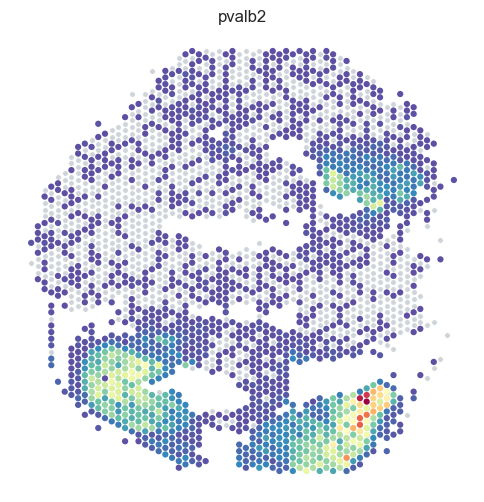

In [9]:
sp.plot.plot_gene('pvalb2', rotate=True, reverse_x=True,figsize=(6,6),save_path='./', spot_size=20)

In [12]:
sim.set_noise_type(noise_type='undersampling', noise_argument=0.1)
a = sim.generate(offset_radius=3, count=100, add_noise=False, offset_probability=0.1)

In [11]:
sp.set_adata(a)

NameError: name 'a' is not defined

<Axes: >

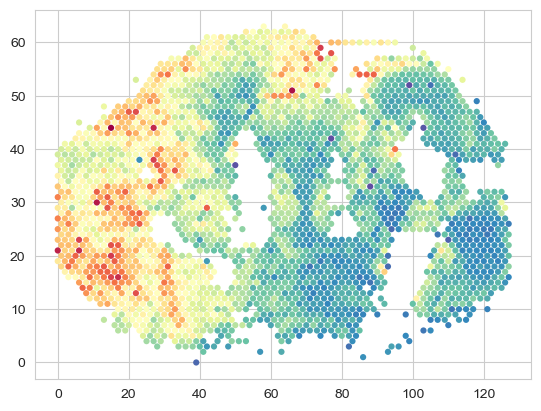

In [13]:
import numpy as np
from scipy.sparse import csr_matrix
import seaborn as sns

data = np.array(sp.adata.X.sum(axis=1)).flatten()
row_indices = np.array(sp.adata.obs['x'].values).flatten()
column_indices = np.array(sp.adata.obs['y'].values).flatten()
global_matrix = csr_matrix((data, (row_indices, column_indices)))

sns.scatterplot(x=global_matrix.nonzero()[1],
                y=global_matrix.nonzero()[0],
                c=global_matrix.data,
                s=20,
                edgecolor='none',
                cmap='Spectral_r')

In [92]:
sp.get_genes_csr_array(min_cells=100, log1p=False)
sp.spatial_high_variable_genes()

Computing ot distances...: 100%|██████████| 700/700 [18:24<00:00,  1.58s/it]


In [5]:
sp.fit_pattern(n_top_genes=-1, n_comp=20,min_cells=0)
sp.build_distance_array()

Building distance array...: 100%|██████████| 700/700 [09:38<00:00,  1.21it/s]


In [117]:
sp.adata.obs

,cell_id,x,y
0,"(3, 34)",3,34
1,"(3, 38)",3,38
2,"(3, 44)",3,44
3,"(4, 25)",4,25
4,"(4, 35)",4,35
...,...,...,...
7064,"(0, 46)",0,46
7065,"(50, 118)",50,118
7066,"(45, 126)",45,126
7067,"(10, 8)",10,8


In [132]:
import pandas as pd
df = pd.DataFrame(data=sp.adata.X, columns=sp.adata.var.index,index=[f"{x[0]}x{x[1]}" for x in [pair for pair in list(sp.adata.obs['cell_id'])]]).T
df.to_csv('spark_test.csv')

In [128]:
[f"{x[0]}x{x[1]}" for x in [pair for pair in list(sp.adata.obs['cell_id'])]]

['3x34',
 '3x38',
 '3x44',
 '4x25',
 '4x35',
 '4x37',
 '4x45',
 '4x51',
 '5x24',
 '5x26',
 '5x28',
 '5x32',
 '5x34',
 '5x38',
 '5x40',
 '6x17',
 '6x23',
 '6x27',
 '6x29',
 '6x31',
 '6x33',
 '6x35',
 '6x47',
 '7x18',
 '7x20',
 '7x22',
 '7x26',
 '7x30',
 '7x32',
 '7x34',
 '7x40',
 '7x64',
 '7x82',
 '8x17',
 '8x19',
 '8x21',
 '8x23',
 '8x25',
 '8x27',
 '8x31',
 '8x33',
 '8x39',
 '8x41',
 '8x45',
 '8x61',
 '8x87',
 '9x20',
 '9x22',
 '9x24',
 '9x30',
 '9x38',
 '9x41',
 '9x44',
 '9x60',
 '9x64',
 '9x72',
 '10x17',
 '10x21',
 '10x23',
 '10x25',
 '10x28',
 '10x31',
 '10x43',
 '10x45',
 '10x49',
 '10x53',
 '11x14',
 '11x16',
 '11x20',
 '11x22',
 '11x26',
 '11x28',
 '11x30',
 '11x32',
 '11x36',
 '11x48',
 '11x50',
 '11x60',
 '12x9',
 '12x11',
 '12x13',
 '12x15',
 '12x21',
 '12x23',
 '12x33',
 '12x37',
 '13x8',
 '13x10',
 '13x12',
 '13x22',
 '13x24',
 '13x26',
 '13x28',
 '13x30',
 '13x32',
 '13x34',
 '13x42',
 '13x46',
 '13x48',
 '13x50',
 '13x54',
 '13x76',
 '13x104',
 '14x7',
 '14x9',
 '14x11',

In [10]:
sp.build_distance_array(method='mse')

Building distance array...: 100%|██████████| 700/700 [00:20<00:00, 33.66it/s]


In [11]:
sp.cluster_gene(n_clusters=7, mds_components=20)

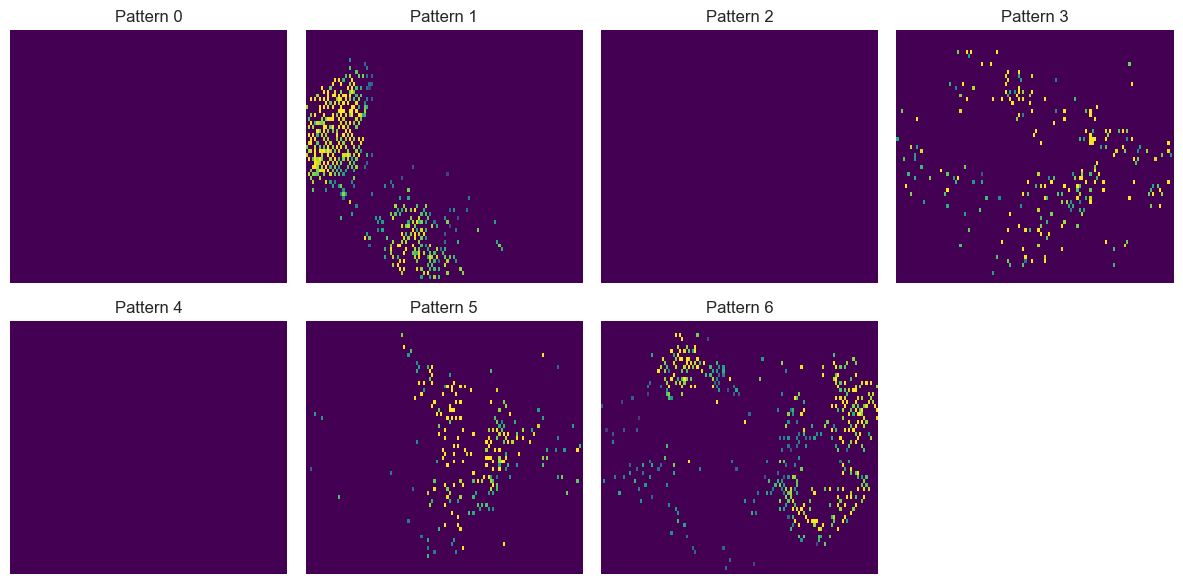

In [23]:
sp.plot.plot_pattern(vmax=99)

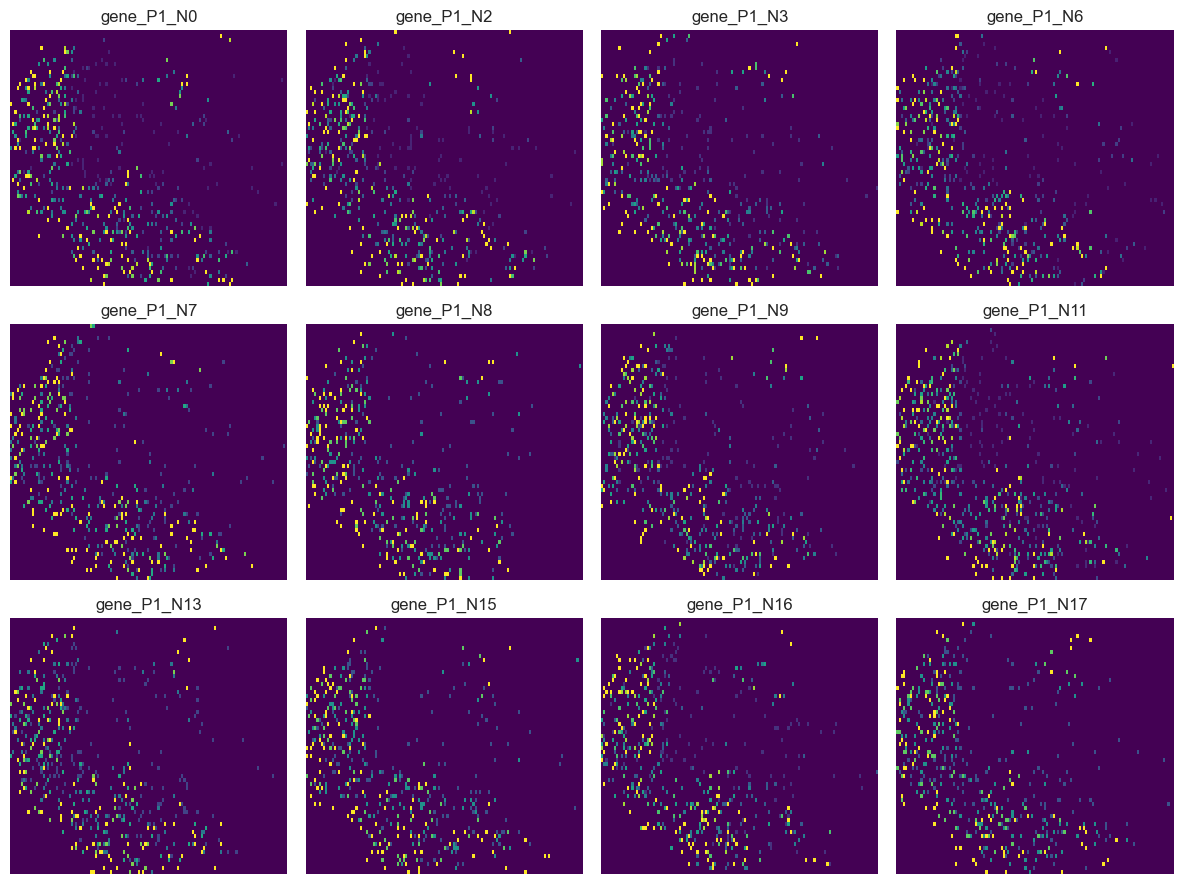

In [22]:
sp.plot.plot_genes(label=1, vmax=99)

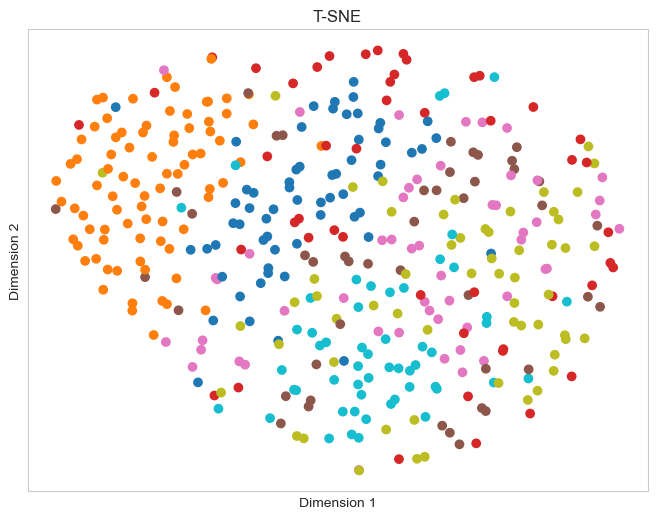

In [21]:
sp.plot.plot_tsne()

In [ ]:
sp.genes_labels

In [ ]:
sp2 = SPFinder(adata=a)
sp2.plot.plot_gene('gene_6_7')
import seaborn as sns
sns.heatmap(get_exp_array(a, 'gene_6_7'))

In [ ]:
li = sim.generate(offset_radius=5, count=5, add_noise=False, offset_probability=0.6)

In [ ]:
from scipy.sparse import csr_matrix
import seaborn as sns
import numpy as np


arr = li[4]
arr = np.maximum(arr - np.mean(arr[arr != 0]), 0)
sparse_matrix = csr_matrix(arr)
sns.scatterplot(x=sparse_matrix.nonzero()[1],
                y=sparse_matrix.nonzero()[0],
                c=sparse_matrix.data,
                cmap='viridis')

In [14]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('I://SVG_test.csv',header=None)

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('I://spark_test.csv',header=None)

In [15]:
df['pattern'] = df[1].apply(lambda x: x.split('_')[1])


<Axes: xlabel='2', ylabel='Count'>

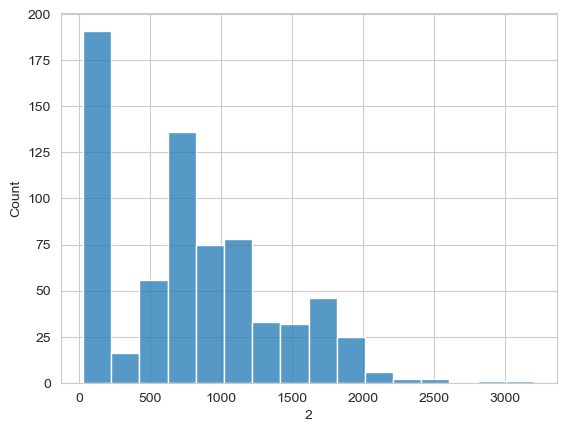

In [23]:
import numpy as np
sns.histplot(df[2])

Text(0, 0.5, 'Spatial Variance level')

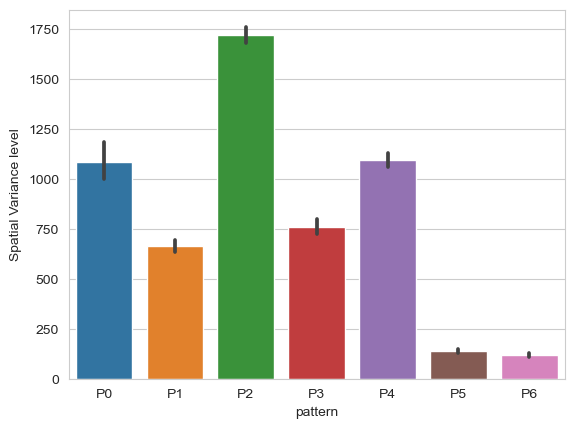

In [25]:
import matplotlib.pyplot as plt
sns.barplot(df,x='pattern',y=2, order=['P0','P1','P2','P3','P4','P5','P6'])
plt.ylabel('Spatial Variance level')

In [ ]:
class p3DPlotter(plotterBase):
    def __init__(self, initSource, initTyp, colorList, ltrParaFile, speIdSet=None):
        super().__init__(initSource, initTyp, colorList, ltrParaFile, speIdSet)
        self.init_3DRela()

    def init_3DRela(self):
        self._3D_maxTypNum = len(self.colorList)

    def transTypList2plotColorList(self, typList):
        plotColorList = []
        for typ in typList:
            if typ == 0:
                plotColorList.append('#cdcdcd')
            else:
                plotColorList.append(self.colorList[typ - 1])
        return plotColorList

    def getLegendElementList(self, typId2annot):
        legendElementList = []
        for typ in typId2annot:
            if typ == 0:
                continue
            legendElementList.append(Line2D([], [],
                                            marker='.',
                                            color=self.colorList[typ - 1],
                                            label=typId2annot[typ],
                                            markersize=25,
                                            markeredgewidth=0,
                                            linestyle='None'))
        return legendElementList

    def plot(self, adata, typList, typId2annot, outGif, plotText=True, plotTree=True):
        # adata is the loaded adata of LTR_Stream.
        # typList should be at range [0, _3D_maxTypNum]
        # 0 for grey color.
        self.checkTypeList(lowestId=0,
                           highestId=self._3D_maxTypNum,
                           typList=typList)
        plotColorList = self.transTypList2plotColorList(typList)
        legendElementList = self.getLegendElementList(typId2annot)
        comp1, comp2, comp3 = 0, 1, 2
        df_plot = pd.DataFrame(index=adata.obs.index,
                               data=adata.obsm['X_dr'],
                               columns=['Dim' + str(x + 1) for x in range(adata.obsm['X_dr'].shape[1])])
        epg = adata.uns['epg']
        flat_tree = adata.uns['flat_tree']
      